In [ ]:
from google.colab import files
files.upload()

In [3]:
!pip install kaggle
!mkdir ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json


In [4]:
!kaggle datasets download -d ketangangal/heart-disease-dataset-uci


Dataset URL: https://www.kaggle.com/datasets/ketangangal/heart-disease-dataset-uci
License(s): CC0-1.0
  0% 0.00/9.24k [00:00<?, ?B/s]
100% 9.24k/9.24k [00:00<00:00, 34.8MB/s]


In [5]:
!unzip heart-disease-dataset-uci.zip


Archive:  heart-disease-dataset-uci.zip
  inflating: HeartDiseaseTrain-Test.csv  


In [8]:
import pandas as pd
df = pd.read_csv('HeartDiseaseTrain-Test.csv')
df.head()

,age,sex,chest_pain_type,resting_blood_pressure,cholestoral,fasting_blood_sugar,rest_ecg,Max_heart_rate,exercise_induced_angina,oldpeak,slope,vessels_colored_by_flourosopy,thalassemia,target
0,52,Male,Typical angina,125,212,Lower than 120 mg/ml,ST-T wave abnormality,168,No,1.0,Downsloping,Two,Reversable Defect,0
1,53,Male,Typical angina,140,203,Greater than 120 mg/ml,Normal,155,Yes,3.1,Upsloping,Zero,Reversable Defect,0
2,70,Male,Typical angina,145,174,Lower than 120 mg/ml,ST-T wave abnormality,125,Yes,2.6,Upsloping,Zero,Reversable Defect,0
3,61,Male,Typical angina,148,203,Lower than 120 mg/ml,ST-T wave abnormality,161,No,0.0,Downsloping,One,Reversable Defect,0
4,62,Female,Typical angina,138,294,Greater than 120 mg/ml,ST-T wave abnormality,106,No,1.9,Flat,Three,Fixed Defect,0


In [9]:
df.info()
df.isnull().sum()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   age                            1025 non-null   int64  
 1   sex                            1025 non-null   object 
 2   chest_pain_type                1025 non-null   object 
 3   resting_blood_pressure         1025 non-null   int64  
 4   cholestoral                    1025 non-null   int64  
 5   fasting_blood_sugar            1025 non-null   object 
 6   rest_ecg                       1025 non-null   object 
 7   Max_heart_rate                 1025 non-null   int64  
 8   exercise_induced_angina        1025 non-null   object 
 9   oldpeak                        1025 non-null   float64
 10  slope                          1025 non-null   object 
 11  vessels_colored_by_flourosopy  1025 non-null   object 
 12  thalassemia                    1025 non-null   o

,age,resting_blood_pressure,cholestoral,Max_heart_rate,oldpeak,target
count,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000
mean,54.434146,131.611707,246.00000,149.114146,1.071512,0.513171
std,9.072290,17.516718,51.59251,23.005724,1.175053,0.500070
min,29.000000,94.000000,126.00000,71.000000,0.000000,0.000000
25%,48.000000,120.000000,211.00000,132.000000,0.000000,0.000000
50%,56.000000,130.000000,240.00000,152.000000,0.800000,1.000000
75%,61.000000,140.000000,275.00000,166.000000,1.800000,1.000000
max,77.000000,200.000000,564.00000,202.000000,6.200000,1.000000


In [10]:
import numpy as np

num_cols = df.select_dtypes(include=[np.number]).columns.tolist()
cat_cols = df.select_dtypes(include=['object','category']).columns.tolist()

num_cols, cat_cols

(['age',
  'resting_blood_pressure',
  'cholestoral',
  'Max_heart_rate',
  'oldpeak',
  'target'],
 ['sex',
  'chest_pain_type',
  'fasting_blood_sugar',
  'rest_ecg',
  'exercise_induced_angina',
  'slope',
  'vessels_colored_by_flourosopy',
  'thalassemia'])

In [11]:
from sklearn.impute import SimpleImputer

imputer_num = SimpleImputer(strategy='median')
df[num_cols] = imputer_num.fit_transform(df[num_cols])

if len(cat_cols) > 0:
    imputer_cat = SimpleImputer(strategy='most_frequent')
    df[cat_cols] = imputer_cat.fit_transform(df[cat_cols])

In [12]:
from sklearn.preprocessing import LabelEncoder

for col in cat_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])

In [13]:
from sklearn.preprocessing import StandardScaler

numeric_cols = num_cols.copy()
numeric_cols.remove('target')

scaler = StandardScaler()
df[numeric_cols] = scaler.fit_transform(df[numeric_cols])

In [14]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
pca_features = pca.fit_transform(df[numeric_cols])

df_pca = pd.DataFrame(pca_features, columns=['PCA1','PCA2'])
df_pca.head()

,PCA1,PCA2
0,-0.907336,-0.207450
1,0.553230,-0.771375
2,2.022815,-1.327612
3,-0.160670,0.496738
4,2.129416,-0.287211


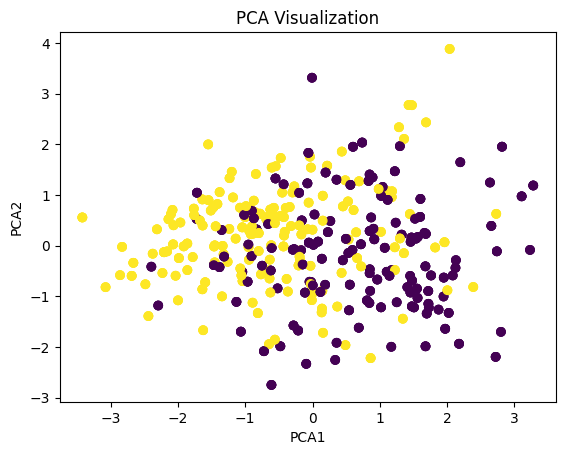

In [15]:
import matplotlib.pyplot as plt

plt.scatter(df_pca['PCA1'], df_pca['PCA2'], c=df['target'])
plt.xlabel("PCA1")
plt.ylabel("PCA2")
plt.title("PCA Visualization")
plt.show()

In [16]:
from sklearn.feature_selection import VarianceThreshold

X = df.drop('target', axis=1)
y = df['target']

vt = VarianceThreshold(threshold=0.01)
X_vt = vt.fit_transform(X)

features_vt = X.columns[vt.get_support()]
features_vt

Index(['age', 'sex', 'chest_pain_type', 'resting_blood_pressure',
       'cholestoral', 'fasting_blood_sugar', 'rest_ecg', 'Max_heart_rate',
       'exercise_induced_angina', 'oldpeak', 'slope',
       'vessels_colored_by_flourosopy', 'thalassemia'],
      dtype='object')

In [17]:
from sklearn.feature_selection import SelectKBest, chi2

X_abs = np.abs(X)

skb = SelectKBest(score_func=chi2, k=5)
X_kbest = skb.fit_transform(X_abs, y)

features_kbest = X.columns[skb.get_support()]
features_kbest

Index(['chest_pain_type', 'exercise_induced_angina', 'slope',
       'vessels_colored_by_flourosopy', 'thalassemia'],
      dtype='object')

In [18]:
print("Original shape:", df.shape)
print("After scaling shape:", X.shape)
print("PCA shape:", df_pca.shape)

print("\nSelected by VarianceThreshold:", list(features_vt))
print("Selected by SelectKBest:", list(features_kbest))

Original shape: (1025, 14)
After scaling shape: (1025, 13)
PCA shape: (1025, 2)

Selected by VarianceThreshold: ['age', 'sex', 'chest_pain_type', 'resting_blood_pressure', 'cholestoral', 'fasting_blood_sugar', 'rest_ecg', 'Max_heart_rate', 'exercise_induced_angina', 'oldpeak', 'slope', 'vessels_colored_by_flourosopy', 'thalassemia']
Selected by SelectKBest: ['chest_pain_type', 'exercise_induced_angina', 'slope', 'vessels_colored_by_flourosopy', 'thalassemia']
